## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
#Importing important modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import numpy as np
import pandas as pd

# Importing required packages
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

import numpy as np
from sklearn.model_selection import train_test_split

# Importing keras package
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras import applications
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, EarlyStopping


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "drive/My Drive/Colab Notebooks/Dog_breed/"

In [0]:
# from google.colab import files
# uploaded = files.upload()project_path+
#'content/drive/My Drive/Colab Notebooks/Dog_breed/' content/drive/My Drive/Colab Notebooks/Dog_breed/sample_submission__dog_cls.csv.zip

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train_dog_cls.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test_dog_cls.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission__dog_cls.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels_dog_cls.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [9]:
#Reading labels csv file
labels = pd.read_csv(project_path + 'labels_dog_cls.csv.zip')
labels.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [10]:
breed_count = labels['breed'].value_counts()
breed_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [11]:
breed_count.shape

(120,)

### Get one-hot encodings of labels

In [0]:
target_variable = pd.Series(labels['breed'])
onehot = pd.get_dummies(target_variable, sparse = True)
labels_onehot = np.array(onehot)

In [13]:
labels_onehot[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [0]:
y = labels_onehot

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128
num_channel = 1

In [16]:
from tqdm import tqdm
import cv2
x_train = []
y_train = []
for f, img in tqdm(labels.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img, (img_rows, img_cols))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:27<00:00, 373.33it/s]


In [17]:
y_train[0]

'boston_bull'

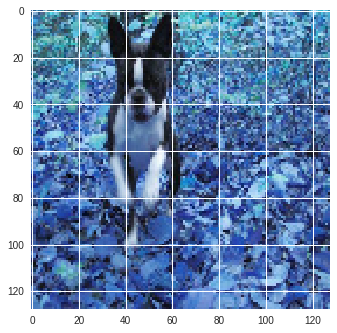

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [19]:
x_train[0].shape

(128, 128, 3)

In [0]:
x_train = np.array(x_train)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
#Normalize training set
x_train = x_train/255;

In [22]:
x_train.shape

(10222, 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y, test_size=0.2, random_state=42)
# print (len(X_train))
# print (len(X_val))

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img = pd.read_csv('sample_submission.csv')

In [25]:
test_img.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


Run the below code to load the test image files in x_test_feature

In [0]:
from tqdm import tqdm
x_test_feature = []
i = 0 # initialisation
for index,row in test_img.iterrows():
    img = cv2.imread('./test/' + row['id'] +'.jpg')
    img_resize = cv2.resize(img, (128, 128)) 
    x_test_feature.append(img_resize)

Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature = np.array(x_test_feature)

In [28]:
x_test_feature.shape

(10357, 128, 128, 3)

In [0]:
x_test_feature = x_test_feature/255

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras import applications
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, EarlyStopping



# Define model
model = Sequential()

#Normalizing the data
model.add(BatchNormalization(input_shape=(128, 128, 3)))

# 1st Conv Layer
model.add(Convolution2D(256, (5, 5), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Conv Layer
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

In [0]:
# Prediction Layer
model.add(Dense(120))
model.add(Activation('softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Train the model
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, 
        validation_data=(X_test, Y_test))

In [0]:
# Training accuracy
score = model.evaluate(X_train, Y_train)
print('Training accuracy: ', score[1])

In [0]:
# Test accuracy
score = model.evaluate(X_test, Y_test)
print('Training accuracy: ', score[1])

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=50,  
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    horizontal_flip=False,  
    vertical_flip=False)


In [0]:
train_datagen.fit(X_train)

In [0]:
val_datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=50,  
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    horizontal_flip=False,  
    vertical_flip=False)

In [0]:
val_datagen.fit(X_test)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(X_train, Y_train, batch_size=32)

In [0]:
val_generator = val_datagen.flow(X_test, Y_test, batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model.fit_generator(
        train_generator,
        steps_per_epoch=len(X_train) / 32,
        epochs=10,
        validation_data=val_generator,validation_steps = len(X_test) / 32)

In [0]:
# Training accuracy
score = model.evaluate(X_train, Y_train)
print('Training accuracy: ', score[1])

In [0]:
# Test accuracy
score = model.evaluate(X_test, Y_test)
print('Test accuracy: ', score[1])

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [0]:
base_model.summary()

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
x = base_model.output
x = Dense(1024, activation="relu")(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(120, activation="softmax")(x)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
# Freeze the layers which you don't want to train. In this we are freezing the first 5 layers.
for layer in base_model.layers[:5]:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
# creating the final model 
model_final = Model(input = base_model.input, output = predictions)

sgd = SGD(lr=0.001)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics=["accuracy"])
